In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

df = pd.read_csv('https://raw.githubusercontent.com/AlexUCAS/ML_SC_LR/main/unique_m.csv')  # data from UCI dataset uploaded to my github
print(df.shape)
df = df.loc[:, (df != 0).any(axis=0)]  # drop columns that only have zero
print(df.shape)

(21263, 88)
(21263, 79)


In [ ]:
columnNames = df.columns
x = df[columnNames[:-2]]  # features
columnNames[:-2]

Index(['H', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Na', 'Mg', 'Al', 'Si', 'P',
       'S', 'Cl', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni',
       'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Rb', 'Sr', 'Y', 'Zr', 'Nb',
       'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I',
       'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho',
       'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au',
       'Hg', 'Tl', 'Pb', 'Bi'],
      dtype='object')

In [ ]:
model = LinearRegression()
model.fit(x, df['critical_temp'])
df['predicted'] = model.predict(x)  # add a predicted Tc column

In [ ]:
df = df.sort_values('critical_temp').reset_index(drop=True)  # sort with respect to Tc; plot becomes readable after sorting
df.head()

,H,Li,Be,B,C,N,O,F,Na,Mg,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,critical_temp,material,predicted
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000210,Rh1,13.890970
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000325,Rh1,13.890970
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000400,Li1,13.976006
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.978,0.0,0.0,0.0,0.0,0.000500,Au0.978In0.022,14.068935
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.000,0.0,0.0,0.0,0.0,0.000620,Pt1,12.607419


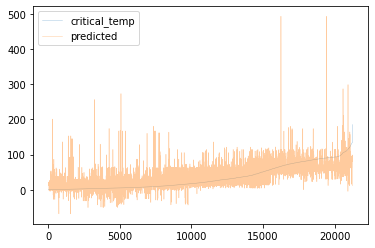

In [ ]:
df[['critical_temp', 'predicted']].plot(alpha=0.4, linewidth=0.5)
# plt.savefig('plot_2.pdf')

# from google.colab import files
# files.download('plot_2.pdf')

    effect
H   -0.586
Li  -0.640
Be  -0.338
B   -0.793
C   -0.166
..     ...
Au  -0.537
Hg  14.163
Tl   6.925
Pb   1.117
Bi   3.128

[77 rows x 1 columns]


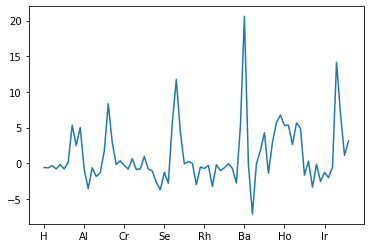

In [ ]:
params = pd.Series(model.coef_, index=df[columnNames[:-2]].columns)
print(pd.DataFrame({'effect': params.round(3)}))
params.plot()

In [ ]:
# from sklearn.utils import resample

# np.random.seed(1)
# err = np.std([model.fit(*resample(x, df['critical_temp'])).coef_
#               for i in range(1000)], 0)
# print(pd.DataFrame({'effect': params.round(3),
#                     'error': err.round(3)}))

In [ ]:
from sklearn.metrics import r2_score

r2_score(df['critical_temp'], df['predicted'])

0.6165899750584181